In [63]:
#tous les imports nécessaires
from pymatgen import Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.symmetry.analyzer import SpacegroupOperations
from pymatgen.core.operations import SymmOp
from IPython.display import Image
from pymatgen.ext.matproj import MPRester
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.symmetry.site_symmetries import *

In [64]:

#téléchargement de ma structure
with MPRester("TJVQZXfS2KHqvsC7QEip") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-505297")

view = quick_view(structure)
display(view)

JsmolView(layout=Layout(align_self='stretch', height='400px'))

In [65]:
#choix des atomes + vérification
summary=struct.get_primitive_standard_structure()
Nb = [0.0, 0.0, 0.0]
Sb = [0.5, 0.5, 0.5]
Ru = [0.25, 0.25, 0.75]
print(summary.sites)
print('observation : vérification OK')

[PeriodicSite: Nb (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000], PeriodicSite: Sb (3.1011, 3.1011, 3.1011) [0.5000, 0.5000, 0.5000], PeriodicSite: Ru (4.6516, 4.6516, 4.6516) [0.7500, 0.7500, 0.7500]]
observation : vérification OK


In [66]:
# Symétries de la molécule
sym = SpacegroupAnalyzer(structure).get_symmetry_operations()
print(sym)
# Symétries choisies pour les atomes
# Plan miroir (z,y,x)
S1 = sym[7]

# Axe 4-barre | centre d'inversion en (0,0,0)  (-x-y-z,x,y)
S2 = sym[3]

# Axe de rotation C2 (y,x,-x-y-z)
S3 = sym[6]

# Atomes choisis
Nb = [0.0, 0.0, 0.0]
Sb = [0.5, 0.5, 0.5]
Ru = [0.25, 0.25, 0.75]

# Application des symétries
Nb_sym = S1.operate(Nb)
Sb_sym = S2.operate(Sb)
Ru_sym = S3.operate(Ru)


[Rot:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
tau
[0. 0. 0.], Rot:
[[ 0.  1.  0.]
 [ 0.  0.  1.]
 [-1. -1. -1.]]
tau
[0. 0. 0.], Rot:
[[ 0.  0.  1.]
 [-1. -1. -1.]
 [ 1.  0.  0.]]
tau
[0. 0. 0.], Rot:
[[-1. -1. -1.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]]
tau
[0. 0. 0.], Rot:
[[-1. -1. -1.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]]
tau
[0. 0. 0.], Rot:
[[ 1.  0.  0.]
 [-1. -1. -1.]
 [ 0.  0.  1.]]
tau
[0. 0. 0.], Rot:
[[ 0.  1.  0.]
 [ 1.  0.  0.]
 [-1. -1. -1.]]
tau
[0. 0. 0.], Rot:
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
tau
[0. 0. 0.], Rot:
[[-1. -1. -1.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]]
tau
[0. 0. 0.], Rot:
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [-1. -1. -1.]]
tau
[0. 0. 0.], Rot:
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
tau
[0. 0. 0.], Rot:
[[ 0.  0.  1.]
 [-1. -1. -1.]
 [ 0.  1.  0.]]
tau
[0. 0. 0.], Rot:
[[ 1.  0.  0.]
 [-1. -1. -1.]
 [ 0.  1.  0.]]
tau
[0. 0. 0.], Rot:
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
tau
[0. 0. 0.], Rot:
[[ 0.  0.  1.]
 [ 0.  1.  0.]
 [-1. -1. -1.]]
tau
[0. 0. 0.], Rot:
[[-1. -1. -1.]
 [ 0.  0. 

Opération de symétrie 1: 

L'atome de départ est le Nb et a comme coordonnées: [0.0, 0.0, 0.0]

On lui applique une symétrie de plan miroir (z,y,x) :

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]] * [0.0, 0.0, 0.0] + [0. 0. 0.]
Coordonées finales : : [0. 0. 0.]



JsmolView(layout=Layout(align_self='stretch', height='400px'))

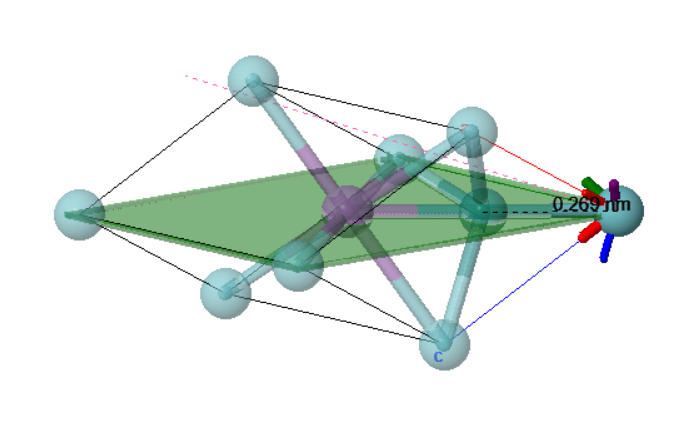

In [67]:
print("Opération de symétrie 1: \n")
print("L'atome de départ est le Nb et a comme coordonnées: {}\n".format(Nb))
print("On lui applique une symétrie de plan miroir (z,y,x) :\n")
print(S1.rotation_matrix, "*", Nb, '+', S1.translation_vector)
print("Coordonées finales : : {}\n".format(Nb_sym))
v1 = quick_view(structure)
display(v1)
v1.script("draw symop 8 {atomno=1}")
Image(filename = "sym1.png")


Opération de symétrie 2: 

L'atome de départ est le Sb et a comme coordonnées: [0.5, 0.5, 0.5]

On lui applique une roto-inversion (-x-y-z,x,y) :
[[-1. -1. -1.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]] * [0.5, 0.5, 0.5] + [0. 0. 0.]
L'atome d'arrivé a comme coordonnées : [-1.5  0.5  0.5]



JsmolView(layout=Layout(align_self='stretch', height='400px'))

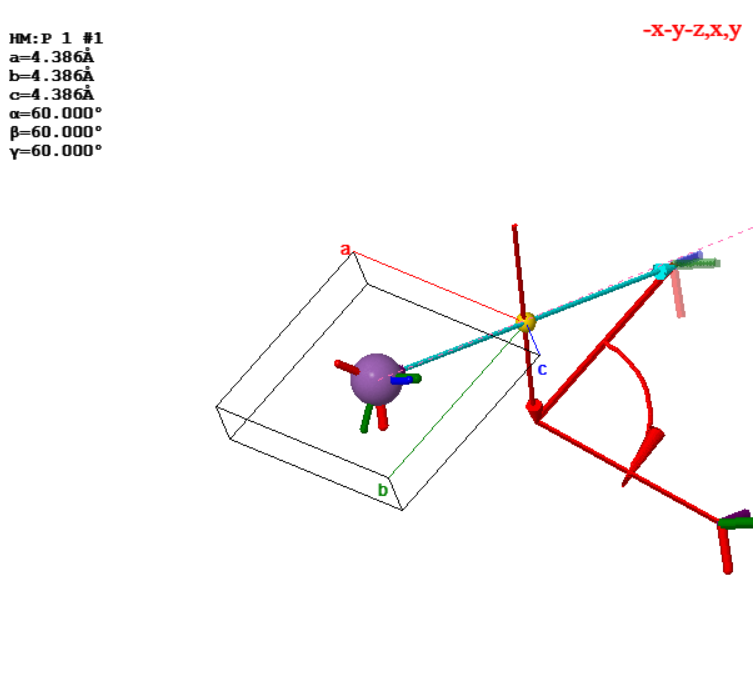

In [68]:
print("Opération de symétrie 2: \n")
print("L'atome de départ est le Sb et a comme coordonnées: {}\n".format(Sb))
print("On lui applique une roto-inversion (-x-y-z,x,y) :")
print(S2.rotation_matrix, "*", Sb, '+', S2.translation_vector)
print("L'atome d'arrivé a comme coordonnées : {}\n".format(Sb_sym))
v1 = quick_view(structure)
display(v1)
v1.script("draw symop 4 {atomno=7}")
Image(filename = "sym2.png")

Opération de symétrie 3: 

L'atome de départ est le Ru et a comme coordonnées: [0.25, 0.25, 0.75]

On lui applique une symétrie d'ordre 2 (y,x,-x-y-z) : 
[[ 0.  1.  0.]
 [ 1.  0.  0.]
 [-1. -1. -1.]] * [0.25, 0.25, 0.75] + [0. 0. 0.]
L'atome d'arrivé a comme coordonnées : [ 0.25  0.25 -1.25]



JsmolView(layout=Layout(align_self='stretch', height='400px'))

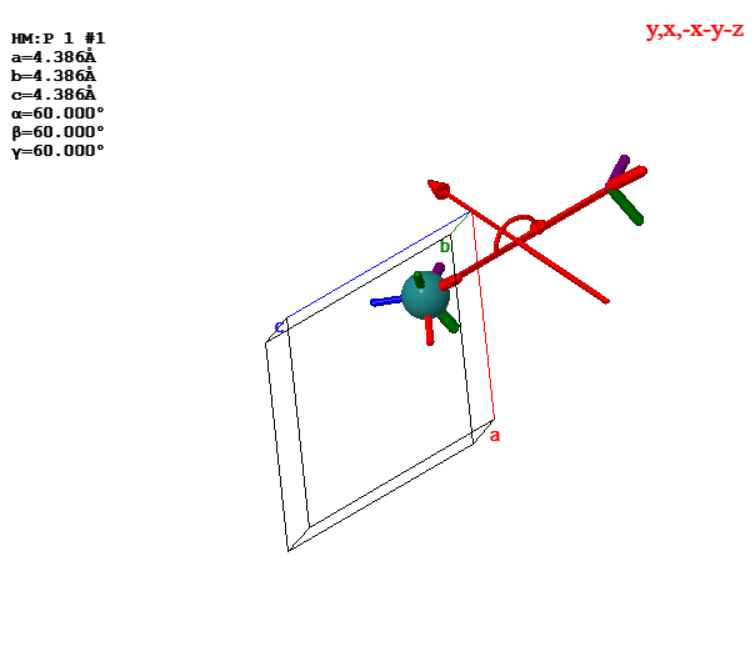

In [62]:
print("Opération de symétrie 3: \n")
print("L'atome de départ est le Ru et a comme coordonnées: {}\n".format(Ru))
print("On lui applique une symétrie d'ordre 2 (y,x,-x-y-z) : ")
print(S3.rotation_matrix, "*", Ru, '+', S3.translation_vector)
print("L'atome d'arrivé a comme coordonnées : {}\n".format(Ru_sym))
v1 = quick_view(structure)
display(v1)
v1.script("draw symop 7 {atomno=3}")
Image(filename = "sym3.png")